In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [3]:
normclust = pd.read_csv('normalized_clustered.csv', index_col = 0)

In [4]:
features = ['age', 'bmi', 'ed_v', 'v_vv', 'sofa', 'pfr', 'pco2', 'pplat', 'lymph',
       'nlrat', 'pct', 'ferritin', 'crp', 'fib', 'ddim']

x = normclust.loc[:, features].values
y = normclust.loc[:,['cluster']].values

In [5]:
pca = PCA(n_components=3)

principalComponents = pca.fit_transform(x)

In [6]:
pcadf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3'])
pcaclus = pd.concat([pcadf, normclust[['cluster']]], axis = 1)

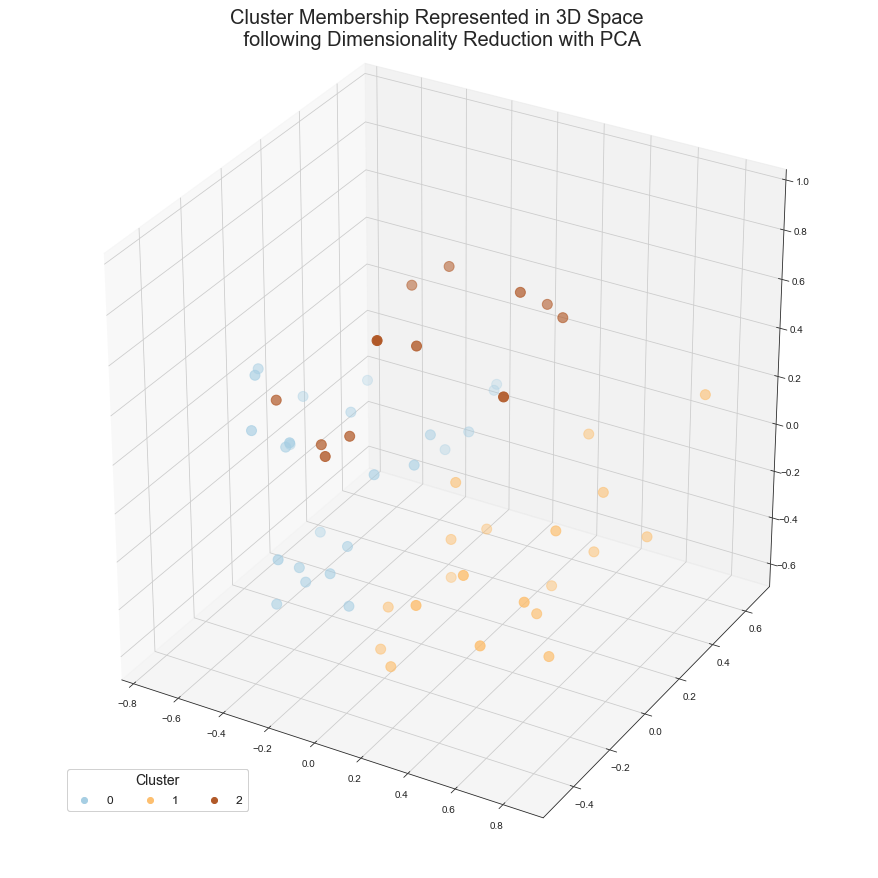

In [10]:
sns.set_style("white")

fig = plt.figure(figsize=(12,12))
fig.tight_layout()

ax = Axes3D(fig)

x = pcaclus['PC1']
z = pcaclus['PC2']
y = pcaclus['PC3']
clus = pcaclus['cluster']

g = ax.scatter(x, y, z, s=100, c=clus, marker='o', depthshade=True, cmap='Paired')

legend = ax.legend(*g.legend_elements(), loc="lower left", title="Cluster", borderaxespad=5, ncol=4, title_fontsize=14, fontsize=12)
ax.add_artist(legend)
ax.set_title('Cluster Membership Represented in 3D Space \n following Dimensionality Reduction with PCA', fontsize=20, pad=30)

sns.despine()

plt.show()

In [38]:
## RECLUSTER BASED ON PCA 3 principal components ###

from sklearn.cluster import KMeans

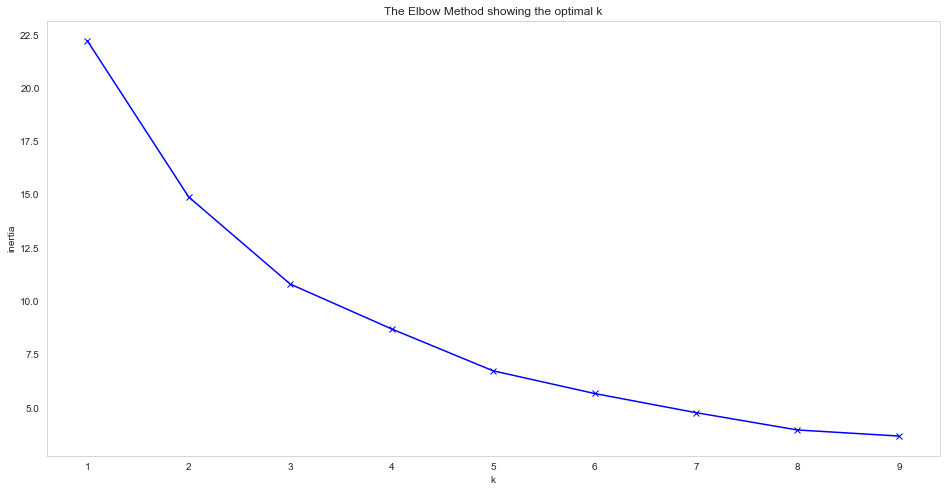

In [22]:
inertia = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, init='k-means++')
    kmeanModel.fit(pcadf)
    inertia.append(kmeanModel.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [32]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=1000, n_jobs=-1).fit(pcadf)
centroids = kmeans.cluster_centers_
print(centroids)

[[-2.70716120e-01 -1.96431135e-01  6.49442135e-02  3.33066907e-16]
 [ 5.20492855e-01 -1.60961597e-01 -1.96919820e-02  2.00000000e+00]
 [-5.12515799e-02  5.01442231e-01 -9.28779880e-02  1.00000000e+00]]


In [33]:
pred = kmeans.predict(pcadf)
pcadf_clustered = pd.DataFrame(pcadf)
pcadf_clustered['cluster'] = pred

In [36]:
pcadf_clustered['cluster'].value_counts()

0    26
2    15
1    15
Name: cluster, dtype: int64

In [37]:
pcaclus['cluster'].value_counts()

0    24
1    20
2    12
Name: cluster, dtype: int64

In [41]:
centroids.shape

(3, 4)

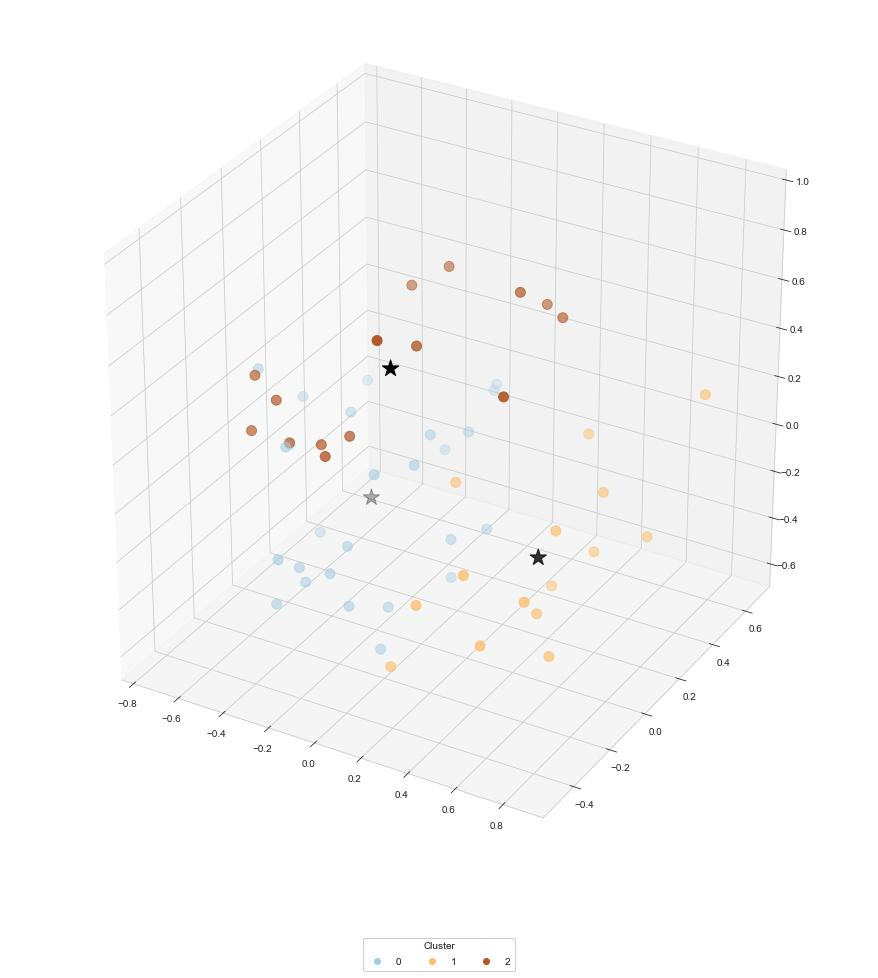

In [52]:
sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(12,12))

ax = Axes3D(fig)

x = pcadf_clustered['PC1']
z = pcadf_clustered['PC2']
y = pcadf_clustered['PC3']
clus = pcadf_clustered['cluster']

g = ax.scatter(x, y, z, s=100, c=clus, marker='o', depthshade=True, cmap='Paired')
ax.scatter(centroids[:,0], centroids[:,2], centroids[:,1], c='black', s=300, marker='*')

legend = ax.legend(*g.legend_elements(), loc="lower center", title="Cluster", borderaxespad=-10, ncol=4)
ax.add_artist(legend)

plt.show()